In [1]:
import random
import numpy as np
from sklearn.linear_model import LinearRegression

from matplotlib import pyplot as plt

# 다항 회귀 실습 - PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [2]:
X = [[2], [4], [6], [8]]
y = [81, 93, 91, 97]

In [3]:
# 단변량 단순 선형 회귀 실습
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.coef_) # 수업 자료 예제의 최소 제곱법 예제와 동일한 결과를 낸다
print(lin_reg.intercept_)

[2.3]
79.0


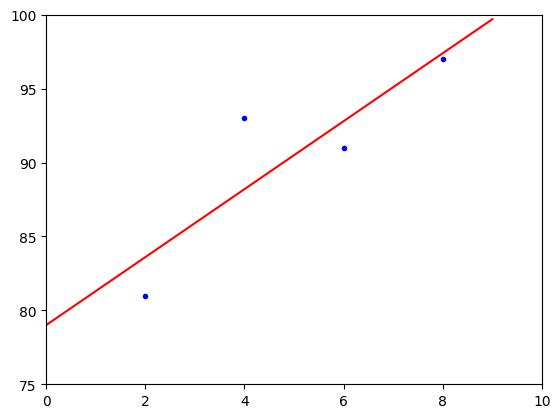

In [4]:
X_new = x = np.arange(0,10).reshape(-1, 1)
y_predict = lin_reg.predict(X_new)

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 10, 75, 100])
plt.show()

In [5]:
X = np.array([[2, 0], [4, 4], [6, 2], [8, 3]])
y = np.array([81, 93, 91, 97])

In [6]:
# 단변량 단순 선형 회귀 실습
lin_reg2 = LinearRegression()
lin_reg2.fit(X, y)
print(lin_reg2.coef_) # 수업 자료 예제의 최소 제곱법 예제와 동일한 결과를 낸다
print(lin_reg2.intercept_)

# 단변량 다중 선형 회귀 실습
# bias는 weight중 하나로 취급을 하여 진행하지만, bias는 독립 변수가 할당되지 않았기 때문에, 독립 변수의 역할을 해주는 1을 부여한다.
tmp_X = np.concatenate((X, [[1],[1],[1],[1]]), axis=1)
np.linalg.inv(tmp_X.T @ tmp_X) @ tmp_X.T @ y.T



[1.5        2.28571429]
77.85714285714286


array([ 1.5       ,  2.28571429, 77.85714286])

In [7]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

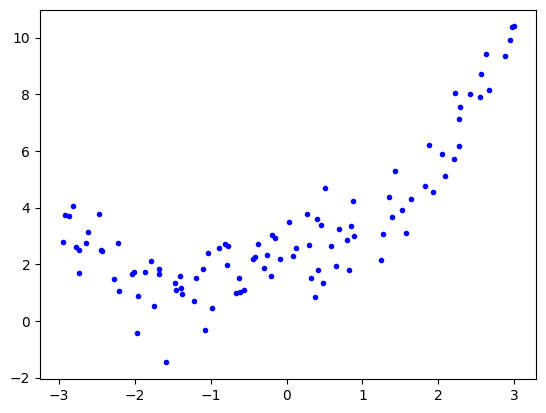

In [8]:
plt.plot(X, y, "b.")
plt.show()

In [9]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X) # 다항식 학습 및 변형
print(X[0])
print(X_poly[0]) # 특성 X에서 다항식 생성을 위한 degree개의 특성이 출력된다.

[-0.88831279]
[-0.88831279  0.78909962]


In [10]:
lin_reg3 = LinearRegression()
lin_reg3.fit(X_poly, y)
lin_reg3.intercept_, lin_reg3.coef_

(array([1.91493451]), array([[1.07755375, 0.50758361]]))

In [11]:
X_new = np.linspace(-3,3,100).reshape(-1, 1)
X_new_poly = poly_features.transform(X_new) # 학습된 다항식에 맞춘 변형 진행
y_new = lin_reg3.predict(X_new_poly)

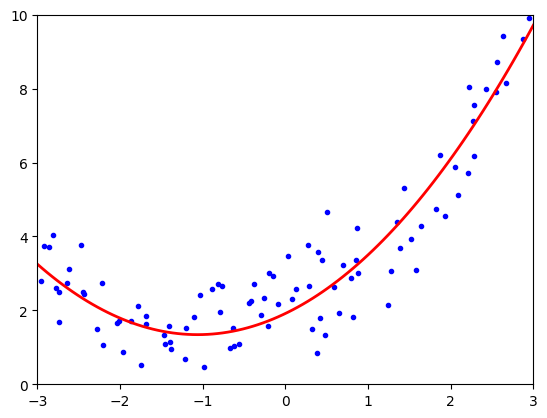

In [12]:
plt.plot(X, y, 'b.')
plt.plot(X_new, y_new, 'r-', linewidth=2, label='Predictions')
plt.axis([-3, 3, 0, 10])
plt.show()

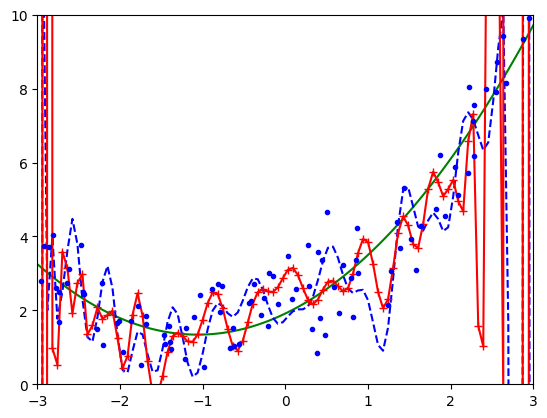

In [13]:
# 2, 50, 100차 다항 회귀 실습
# X_new = x = np.linspace(-3,3,100).reshape(-1, 1)

for style, degree in [('g-', 2), ('b--', 50), ('r-+', 100)]:
  # 2, 50, 100차 다항 회귀 실습
  poly_features = PolynomialFeatures(degree=degree, include_bias=False)
  std = StandardScaler()
  lin_reg_n = LinearRegression()

  polynomial_regression = Pipeline([
      ('poly_features', poly_features),
      ('std_scaler', std),
      ('lin_reg', lin_reg_n)
  ])
  polynomial_regression.fit(X, y)
  y_new = polynomial_regression.predict(X_new)
  plt.plot(X_new, y_new, style)

  lin_reg_n.fit(X_poly, y)

plt.plot(X, y, 'b.')
plt.axis([-3, 3, 0, 10])
plt.show()
# 다항이 커질수록, 과적합이 심해지는 것을 확인할 수 있다.